Loading relevant packages

In [109]:
import requests
import json
from json import loads
import pandas as pd
from datetime import datetime
import time
import loading
import util
import processing
import importlib
importlib.reload(loading)
importlib.reload(util)
importlib.reload(processing)

<module 'processing' from '/Users/jeremyelvander/STA-141B-Final-Project/processing.py'>

Using BART API to find relevant station information (Station name, Lattitude & Longitude for mapping)

In [3]:
df = loading.stationLoad(["San Francisco", "Oakland"])


In [100]:
df

,city,name,gtfs_latitude,gtfs_longitude
0,Oakland,12th St. Oakland City Center,37.803768,-122.271450
1,Oakland,Oakland International Airport,37.713238,-122.212191
2,Oakland,MacArthur,37.829065,-122.267040
3,Oakland,Lake Merritt,37.797027,-122.265180
4,Oakland,Rockridge,37.844702,-122.251371
5,Oakland,Coliseum,37.753661,-122.196869
6,Oakland,Fruitvale,37.774836,-122.224175
7,Oakland,19th St. Oakland,37.808350,-122.268602
8,Oakland,West Oakland,37.804872,-122.295140
9,San Francisco,Embarcadero,37.792874,-122.397020


In [4]:

dct = util.dfToDict(df, 'name', ['gtfs_latitude', 'gtfs_longitude'], groupby = 'city')
print(dct)
dct['San Francisco']['Balboa Park']

{'Oakland': {'12th St. Oakland City Center': [37.803768, -122.27145], '19th St. Oakland': [37.80835, -122.268602], 'Coliseum': [37.753661, -122.196869], 'Fruitvale': [37.774836, -122.224175], 'Lake Merritt': [37.797027, -122.26518], 'MacArthur': [37.829065, -122.26704], 'Oakland International Airport': [37.713238, -122.212191], 'Rockridge': [37.844702, -122.251371], 'West Oakland': [37.804872, -122.29514]}, 'San Francisco': {'16th St. Mission': [37.765062, -122.419694], '24th St. Mission': [37.75247, -122.418143], 'Balboa Park': [37.721585, -122.447506], 'Civic Center/UN Plaza': [37.779732, -122.414123], 'Embarcadero': [37.792874, -122.39702], 'Glen Park': [37.733064, -122.433817], 'Montgomery St.': [37.789405, -122.401066], 'Powell St.': [37.784471, -122.407974]}}


[37.721585, -122.447506]

In [5]:
secretKey = '1ef8dner8br348ez190z3z188a6pm1yluwh2wcj4xjjnlvupe'
key = '523e7ewewudxb1frvbmdftwdt'


In [116]:
importlib.reload(processing)
importlib.reload(util)
queries = [['SF', dct['San Francisco']['Balboa Park'], 0.25, 2021, 15, 0],
            ['SF', dct['San Francisco']['Embarcadero'], 0.25, 2021, 15, 0],
            ['SF', dct['San Francisco']['Glen Park'], 0.25, 2021, 15, 0],
            ['SF', dct['San Francisco']['Civic Center/UN Plaza'], 0.25, 2021, 15, 0]]





meta2 = [[
    #Dataset lists lat long backwards!
    ['incident_category'],
    ['point', ['longitude', 'latitude'], 'coordinates', True],
    {"city": "San Francisco", "station": "Balboa Park"}
 ],
 [['incident_category'],
    ['point', ['longitude', 'latitude'], 'coordinates', True],
    {"city": "San Francisco", "station": "Embarcadero"}],
[['incident_category'],
    ['point', ['longitude', 'latitude'], 'coordinates', True],
    {"city": "San Francisco", "station": "Glen Park"}
 ],
 [['incident_category'],
    ['point', ['longitude', 'latitude'], 'coordinates', True],
    {"city": "San Francisco", "station": "Civic Center/UN Plaza"}
 ]
]

subprocesses = [
    util.isViolent, 
    util.splitColumnsJSON,
    util.addColumnsJSON,
    util.isViolent, 
    util.splitColumnsJSON,
    util.addColumnsJSON,
    util.isViolent, 
    util.splitColumnsJSON,
    util.addColumnsJSON
]

testFrame, through, time = processing.parallelProcess(10, loading.loadCrime, queries, 
                                       'load', True, 15, subprocesses,
                                       meta2, key, secretKey)

testFrame

time for batch: [(2.9714322090148926, 15)]
time for batch: [(3.5741608142852783, 15)]
time for batch: [(4.768509864807129, 15)]
time for batch: [(5.554981231689453, 15)]
Time taken to process (seconds): 5.587193727493286


,incident_datetime,incident_category,isViolent,longitude,latitude,city,station
0,2021-01-05T14:30:00.000,Larceny Theft,False,-122.449296,37.721752,San Francisco,Balboa Park
1,2021-01-07T07:47:00.000,Motor Vehicle Theft,False,-122.447562,37.719481,San Francisco,Balboa Park
2,2021-01-07T14:00:00.000,Larceny Theft,False,-122.449279,37.720151,San Francisco,Balboa Park
3,2021-01-07T16:20:00.000,Malicious Mischief,False,-122.446609,37.720724,San Francisco,Balboa Park
4,2021-01-08T17:05:00.000,Other Miscellaneous,False,-122.445128,37.720087,San Francisco,Balboa Park
5,2021-01-10T20:00:00.000,Larceny Theft,False,-122.450821,37.719355,San Francisco,Balboa Park
6,2021-01-12T20:48:00.000,Weapons Offense,False,-122.447792,37.718865,San Francisco,Balboa Park
7,2021-01-13T23:30:00.000,Lost Property,False,-122.450821,37.719355,San Francisco,Balboa Park
8,2021-01-14T20:30:00.000,Larceny Theft,False,-122.450927,37.720813,San Francisco,Balboa Park
9,2021-01-31T08:00:00.000,Other Miscellaneous,False,-122.445485,37.719512,San Francisco,Balboa Park


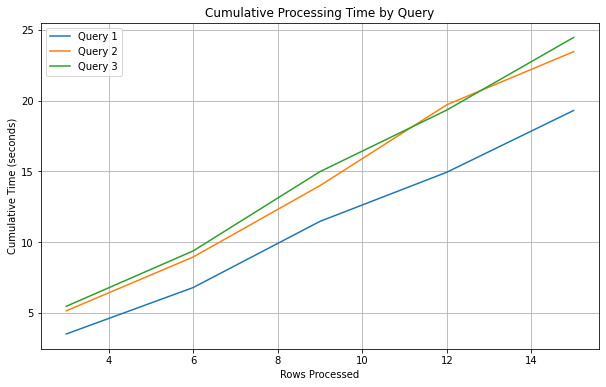

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

# Sample data
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = through

# Number of queries
num_queries = len(data)

# Initialize storage for cumulative times and rows processed
cumulative_times = []
cumulative_rows = []

# Process each query
for query in data:
    # Extract processing times and rows processed for this query
    times = [entry[0] for entry in query]
    rows = [entry[1] for entry in query]

    # Calculate cumulative time and rows
    cumulative_times.append(np.cumsum(times))
    cumulative_rows.append(np.cumsum(rows))

# Plotting
plt.figure(figsize=(10, 6))

# Plot cumulative time for each query
for query_idx in range(num_queries):
    plt.plot(cumulative_rows[query_idx], cumulative_times[query_idx], label=f"Query {query_idx + 1}")

# Add labels, legend, and grid
plt.title("Cumulative Processing Time by Query")
plt.xlabel("Rows Processed")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [14]:
start = time.time()
data = loading.loadCrime("SF", dct['San Francisco']['Balboa Park'],
                         0.25, 2021, 10, 0, key, secretKey)

data1 = loading.loadCrime("SF", dct['San Francisco']['Embarcadero'],
                         0.25, 2021, 10, 0,key, secretKey)

data = loading.loadCrime("SF", dct['San Francisco']['Balboa Park'],
                         0.25, 2021, 10, 10, key, secretKey)

data1 = loading.loadCrime("SF", dct['San Francisco']['Embarcadero'],
                         0.25, 2021, 10, 10,key, secretKey)

data = loading.loadCrime("SF", dct['San Francisco']['Balboa Park'],
                         0.25, 2021, 10, 20, key, secretKey)

data1 = loading.loadCrime("SF", dct['San Francisco']['Embarcadero'],
                         0.25, 2021, 10, 20,key, secretKey)

data = loading.loadCrime("SF", dct['San Francisco']['Balboa Park'],
                         0.25, 2021, 10, 30, key, secretKey)

data1 = loading.loadCrime("SF", dct['San Francisco']['Embarcadero'],
                         0.25, 2021, 10, 30,key, secretKey)

data = loading.loadCrime("SF", dct['San Francisco']['Balboa Park'],
                         0.25, 2021, 10, 40, key, secretKey)

data1 = loading.loadCrime("SF", dct['San Francisco']['Embarcadero'],
                         0.25, 2021, 10, 40,key, secretKey)




end = time.time()
print(end-start)

41.722973108291626
